# Brazilian Portuguese Semantic Textual Similarity

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
language = "Brazilian Portuguese"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [4]:
train[:10]

,id,sentence_1,sentence_2,similarity,entailment
0,1,"A gente faz o aporte financeiro, é como se a e...",Fernando Moraes afirma que não tem vínculo com...,2.00,None
1,2,"Em 2013, a história de como Walt Disney conven...",P.L.Travers era completamente contra a adaptaç...,2.25,None
2,3,"David Silva bateu escanteio, Kompany escalou a...","David Silva cobrou escanteio, o zagueiro se ap...",3.75,None
3,4,"Para os ambientalistas, as metas anunciadas pe...","Dilma aproveitou seu discurso ontem, na Confer...",2.75,None
4,5,"De acordo com a PM, por volta das 10h30 havia ...",O protesto encerrou por volta de 12h15 (horári...,2.00,None
5,6,A programação entra em cartaz nesta quinta-fei...,A animação “Hotel Transilvânia 2” entra em car...,3.00,None
6,7,"Claudia Leitte, porém, ainda não escolheu o aj...",Somente Claudia Leitte não concordou plenament...,2.25,None
7,8,As informações são da Superintendência de Trân...,"Ainda segundo a Transalvador, não há informaçõ...",2.00,None
8,9,"Os sintomas da zika vírus, dengue e febre chik...",Foram registrados 316 casos suspeitos de Febre...,2.25,None
9,10,Tenho orgulho de ter feito parte da construção...,"Ajudei a construir o PSOL, e disso muito me or...",5.00,Paraphrase


In [5]:
train.describe()

,id,similarity
count,2500.00000,2500.000000
mean,1250.50000,3.054600
std,721.83216,0.860357
min,1.00000,1.000000
25%,625.75000,2.500000
50%,1250.50000,3.000000
75%,1875.25000,3.750000
max,2500.00000,5.000000


In [6]:
test[:10]

,id,sentence_1,sentence_2,similarity,entailment
0,1,"No Brasil, 809 instituições participarão da Pr...","Começa nesta segunda-feira, em todo o Brasil, ...",3.25,None
1,2,Alguns dos novos participantes serão revelados...,Parte dos participantes será anunciada no Prog...,4.00,Entailment
2,3,"Nesta terça, o Inter revelou que o gringo sofr...","Nesta terça-feira, o departamento médico do cl...",4.50,None
3,4,O texto da reforma política será agora encamin...,"Após passar pela Câmara, o texto tem que ir ai...",4.00,None
4,5,O Fluminense vive crise em campo e não vence h...,"Nos últimos seis jogos, o Fluminense foi derro...",4.25,Entailment
5,6,John Lennon nasceu em 9 de outubro de 1940 em ...,"Hoje, dia 9 de outubro, John Lennon estaria co...",3.00,None
6,7,"Segundo Lagarde, esse fenômeno deverá levar o ...",Esse fenômeno deve levar o FMI a revisar para ...,4.00,Entailment
7,8,"De acordo com o Corpo de Bombeiros, o acidente...","Segundo os bombeiros, o chamado foi feito às 6...",3.00,None
8,9,O botão de um dedão apontado para cima é um do...,Atendendo ao pedido de muitos usuários da rede...,2.00,None
9,10,Margarida Maria afirmava que “é melhor morrer ...,Margarida Maria Alves sabia dos riscos de sua ...,3.25,None


In [7]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

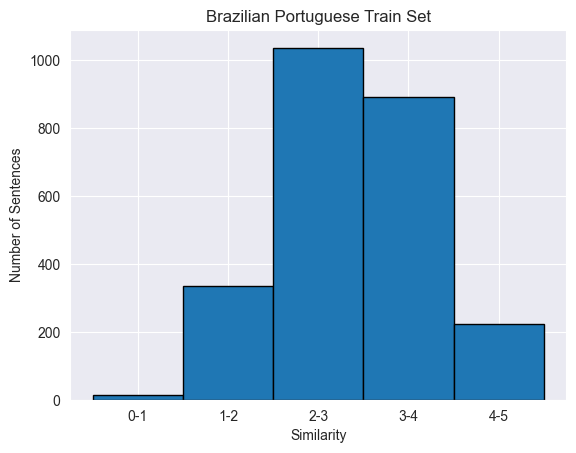

In [8]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

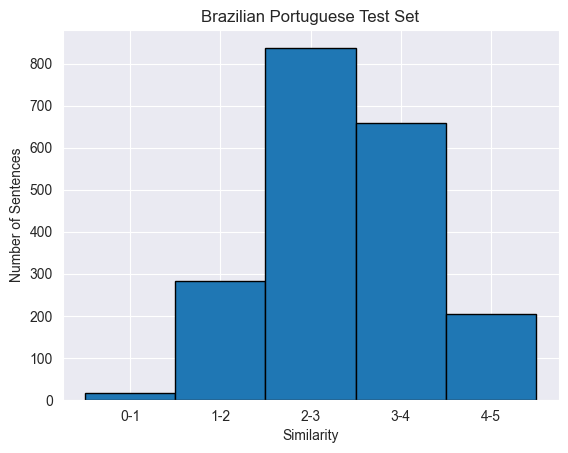

In [9]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [10]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [11]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

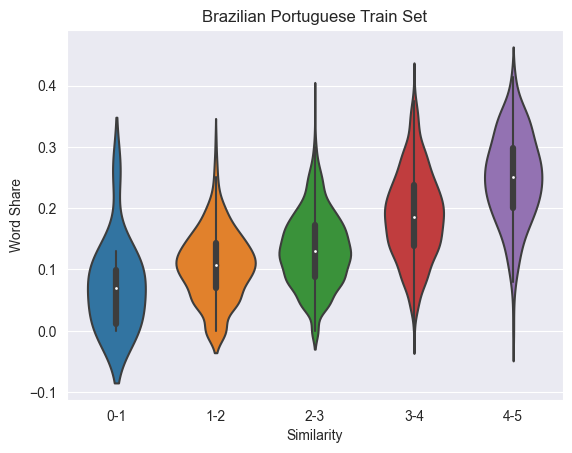

In [12]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

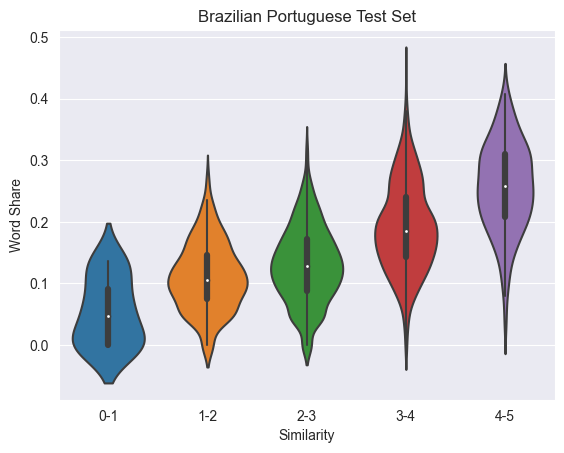

In [13]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [14]:
train[:10]

,id,sentence_1,sentence_2,similarity,entailment,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,1,"A gente faz o aporte financeiro, é como se a e...",Fernando Moraes afirma que não tem vínculo com...,2.00,None,1-2,1,1,84,79,16,14,2.0,29,0.068966,2,0
1,2,"Em 2013, a história de como Walt Disney conven...",P.L.Travers era completamente contra a adaptaç...,2.25,None,2-3,1,1,54,64,10,9,3.0,19,0.157895,2,0
2,3,"David Silva bateu escanteio, Kompany escalou a...","David Silva cobrou escanteio, o zagueiro se ap...",3.75,None,3-4,1,1,95,75,15,12,7.0,27,0.259259,2,0
3,4,"Para os ambientalistas, as metas anunciadas pe...","Dilma aproveitou seu discurso ontem, na Confer...",2.75,None,2-3,1,1,82,127,12,17,2.0,29,0.068966,2,0
4,5,"De acordo com a PM, por volta das 10h30 havia ...",O protesto encerrou por volta de 12h15 (horári...,2.00,None,1-2,1,1,72,55,15,9,3.0,24,0.125000,2,0
5,6,A programação entra em cartaz nesta quinta-fei...,A animação “Hotel Transilvânia 2” entra em car...,3.00,None,2-3,1,1,94,97,15,15,6.0,29,0.206897,2,0
6,7,"Claudia Leitte, porém, ainda não escolheu o aj...",Somente Claudia Leitte não concordou plenament...,2.25,None,2-3,1,1,53,61,8,9,3.0,17,0.176471,2,0
7,8,As informações são da Superintendência de Trân...,"Ainda segundo a Transalvador, não há informaçõ...",2.00,None,1-2,1,1,91,78,12,13,2.0,24,0.083333,2,0
8,9,"Os sintomas da zika vírus, dengue e febre chik...",Foram registrados 316 casos suspeitos de Febre...,2.25,None,2-3,1,1,70,59,11,8,1.0,19,0.052632,2,0
9,10,Tenho orgulho de ter feito parte da construção...,"Ajudei a construir o PSOL, e disso muito me or...",5.00,Paraphrase,4-5,1,1,55,52,10,10,0.0,20,0.000000,2,0


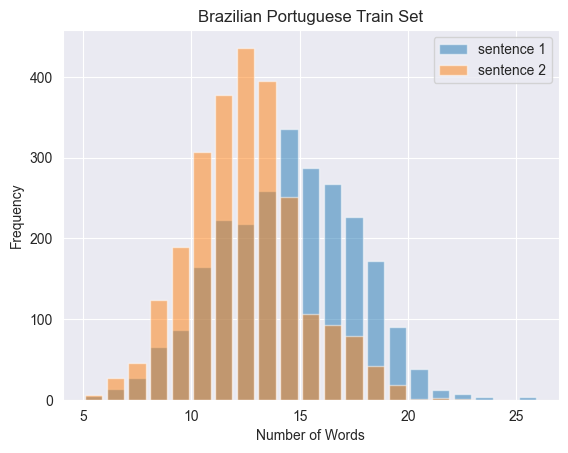

In [15]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

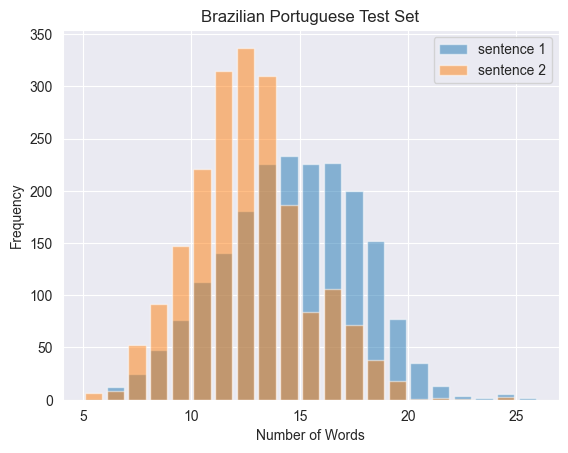

In [16]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [17]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,2500.00000,2500.000000,2500.0,2500.0,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0,2500.0
mean,1250.50000,3.054600,1.0,1.0,82.131600,71.096000,13.956800,11.959600,4.050800,24.976000,0.159269,2.0,0.0
std,721.83216,0.860357,0.0,0.0,19.561005,16.489595,3.108247,2.551661,2.211374,4.158358,0.077454,0.0,0.0
min,1.00000,1.000000,1.0,1.0,24.000000,25.000000,5.000000,4.000000,0.000000,10.000000,0.000000,2.0,0.0
25%,625.75000,2.500000,1.0,1.0,68.000000,60.000000,12.000000,10.000000,2.000000,22.000000,0.103448,2.0,0.0
50%,1250.50000,3.000000,1.0,1.0,82.000000,70.000000,14.000000,12.000000,4.000000,25.000000,0.153846,2.0,0.0
75%,1875.25000,3.750000,1.0,1.0,95.000000,81.000000,16.000000,13.000000,5.000000,28.000000,0.208333,2.0,0.0
max,2500.00000,5.000000,1.0,1.0,149.000000,146.000000,25.000000,22.000000,15.000000,39.000000,0.413793,2.0,0.0


In [18]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,2000.000000,2000.000000,2000.0,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0,2000.0
mean,1000.500000,3.040250,1.0,1.0,83.243000,71.720000,14.160500,12.110000,4.144500,25.239000,0.159914,2.0,0.0
std,577.494589,0.871893,0.0,0.0,20.318203,17.048664,3.209032,2.668044,2.380852,4.364218,0.079726,0.0,0.0
min,1.000000,1.000000,1.0,1.0,25.000000,22.000000,5.000000,4.000000,0.000000,13.000000,0.000000,2.0,0.0
25%,500.750000,2.500000,1.0,1.0,69.000000,60.000000,12.000000,10.000000,2.000000,22.000000,0.103448,2.0,0.0
50%,1000.500000,3.000000,1.0,1.0,83.500000,70.000000,14.000000,12.000000,4.000000,25.000000,0.153846,2.0,0.0
75%,1500.250000,3.750000,1.0,1.0,97.000000,82.000000,16.000000,14.000000,5.000000,28.000000,0.208333,2.0,0.0
max,2000.000000,5.000000,1.0,1.0,207.000000,162.000000,34.000000,24.000000,16.000000,51.000000,0.444444,2.0,0.0
